In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('aus.csv')

# Extract data for Witchcliffe
witchcliffe_data = data[data['Location'] == 'Witchcliffe']

witchcliffe_data.head()


Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
111611  2009-01-01  Witchcliffe     11.9     28.3       0.0          NaN   
111612  2009-01-02  Witchcliffe     15.1     28.8       0.0          NaN   
111613  2009-01-03  Witchcliffe     16.6     24.7       0.0          NaN   
111614  2009-01-04  Witchcliffe     13.9     29.9       0.0          NaN   
111615  2009-01-05  Witchcliffe     15.6     30.1       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
111611       NaN         SSE           39.0        ESE  ...        66.0   
111612       NaN         SSE           50.0         SE  ...        65.0   
111613       NaN          SE           44.0         SE  ...        66.0   
111614       NaN         SSE           44.0         SE  ...        62.0   
111615       NaN         SSE           44.0         SE  ...        71.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
111611         49.0       1015.0       1012.0       NaN       NaN     17.5   
111612         48.0       1012.4       1011.4       NaN       NaN     21.0   
111613         54.0       1016.9       1016.2       NaN       NaN     20.3   
111614         44.0       1020.1       1016.9       NaN       NaN     19.8   
111615         56.0       1017.5       1015.5       NaN       NaN     20.7   

        Temp3pm  RainToday  RainTomorrow  
111611     27.7         No            No  
111612     27.9         No            No  
111613     23.7         No            No  
111614     29.1         No            No  
111615     26.5         No            No  

[5 rows x 23 columns]

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 1. Impute missing values

# Numerical columns
numerical_cols = witchcliffe_data.select_dtypes(include=['float64']).columns

# Apply MICE imputation on numerical columns
imputer = IterativeImputer(max_iter=10, random_state=0)
witchcliffe_data[numerical_cols] = imputer.fit_transform(witchcliffe_data[numerical_cols])

# Categorical columns
categorical_cols = witchcliffe_data.select_dtypes(include=['object']).columns.drop(['Date', 'Location'])

# Impute missing values in categorical columns with mode
for col in categorical_cols:
    mode_val = witchcliffe_data[col].mode()[0]
    witchcliffe_data[col].fillna(mode_val, inplace=True)

# 2. Handle inconsistencies (if any)
# For this dataset, inconsistencies were previously handled using rainfall data to impute 'RainToday' and 'RainTomorrow' columns.
# We'll follow the same logic for the Witchcliffe data.

witchcliffe_data['RainToday'] = witchcliffe_data['RainToday'].where(witchcliffe_data['Rainfall'] <= 1, 'Yes')
witchcliffe_data['RainToday'] = witchcliffe_data['RainToday'].where(witchcliffe_data['Rainfall'] > 1, 'No')
witchcliffe_data['RainTomorrow'] = witchcliffe_data['RainTomorrow'].shift(-1) # Shift to get the next day's rainfall
witchcliffe_data['RainTomorrow'] = witchcliffe_data['RainTomorrow'].where(witchcliffe_data['Rainfall'] <= 1, 'Yes')
witchcliffe_data['RainTomorrow'] = witchcliffe_data['RainTomorrow'].where(witchcliffe_data['Rainfall'] > 1, 'No')

# 3. Save the cleaned Witchcliffe data to a new CSV file
cleaned_file_path = "cleaned_witchcliffe.csv"
witchcliffe_data.to_csv(cleaned_file_path, index=False)

cleaned_file_path


C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: [ 3  4 12 13]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Columns must be same length as key

In [123]:
# 2. Find the number of missing dates for each district (location)
full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())
missing_dates_by_location = {}

for location in df["Location"].unique():
    location_dates = pd.to_datetime(df[df["Location"] == location]["Date"])
    missing_dates = len(full_date_range.difference(location_dates))
    missing_dates_by_location[location] = missing_dates

print(missing_dates_by_location)

# 3. Identify the number of missing rainfall data along with their respective dates, grouped by location
missing_rainfall_data = df[df["Rainfall"].isnull()]
missing_rainfall_dates_by_location = missing_rainfall_data.groupby("Location")["Date"].apply(list).to_dict()
missing_rainfall_counts_by_location = {location: len(dates) for location, dates in missing_rainfall_dates_by_location.items()}

# print(missing_rainfall_counts_by_location)


{'Albury': 485, 'BadgerysCreek': 516, 'Cobar': 516, 'CoffsHarbour': 516, 'Moree': 516, 'Newcastle': 486, 'NorahHead': 521, 'NorfolkIsland': 516, 'Penrith': 486, 'Richmond': 516, 'Sydney': 181, 'SydneyAirport': 516, 'WaggaWagga': 516, 'Williamtown': 516, 'Wollongong': 485, 'Canberra': 89, 'Tuggeranong': 486, 'MountGinini': 485, 'Ballarat': 485, 'Bendigo': 485, 'Sale': 516, 'MelbourneAirport': 516, 'Melbourne': 332, 'Mildura': 516, 'Nhil': 1947, 'Portland': 516, 'Watsonia': 516, 'Dartmoor': 516, 'Brisbane': 332, 'Cairns': 485, 'GoldCoast': 485, 'Townsville': 485, 'Adelaide': 332, 'MountGambier': 485, 'Nuriootpa': 516, 'Woomera': 516, 'Albany': 485, 'Witchcliffe': 516, 'PearceRAAF': 516, 'PerthAirport': 516, 'Perth': 332, 'SalmonGums': 524, 'Walpole': 519, 'Hobart': 332, 'Launceston': 485, 'AliceSprings': 485, 'Darwin': 332, 'Katherine': 1947, 'Uluru': 1947}


In [158]:
import pandas as pd

# Load the dataset
data = pd.read_csv('aus.csv')

# Filter out the Canberra records
canberra_data = data[data['Location'] == 'Canberra']

canberra_data.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
45587  2007-11-01  Canberra      8.0     24.3       0.0          3.4   
45588  2007-11-02  Canberra     14.0     26.9       3.6          4.4   
45589  2007-11-03  Canberra     13.7     23.4       3.6          5.8   
45590  2007-11-04  Canberra     13.3     15.5      39.8          7.2   
45591  2007-11-05  Canberra      7.6     16.1       2.8          5.6   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
45587       6.3          NW           30.0         SW  ...        68.0   
45588       9.7         ENE           39.0          E  ...        80.0   
45589       3.3          NW           85.0          N  ...        82.0   
45590       9.1          NW           54.0        WNW  ...        62.0   
45591      10.6         SSE           50.0        SSE  ...        68.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
45587         29.0       1019.7       1015.0       7.0       7.0     14.4   
45588         36.0       1012.4       1008.4       5.0       3.0     17.5   
45589         69.0       1009.5       1007.2       8.0       7.0     15.4   
45590         56.0       1005.5       1007.0       2.0       7.0     13.5   
45591         49.0       1018.3       1018.5       7.0       7.0     11.1   

       Temp3pm  RainToday  RainTomorrow  
45587     23.6         No           Yes  
45588     25.7        Yes           Yes  
45589     20.2        Yes           Yes  
45590     14.1        Yes           Yes  
45591     15.4        Yes            No  

[5 rows x 23 columns]

In [159]:
# 1. Find the number of missing dates for each district (location)
missing_dates_by_location_df = pd.DataFrame(list(missing_dates_by_location.items()), columns=['Location', 'Missing Dates Count'])

# 2. Identify the number of missing rainfall data along with their respective dates, grouped by location
missing_rainfall_counts_by_location_df = pd.DataFrame(list(missing_rainfall_counts_by_location.items()), columns=['Location', 'Missing Rainfall Count'])

missing_dates_by_location_df, missing_rainfall_counts_by_location_df

(            Location  Missing Dates Count
 0             Albury                  485
 1      BadgerysCreek                  516
 2              Cobar                  516
 3       CoffsHarbour                  516
 4              Moree                  516
 5          Newcastle                  486
 6          NorahHead                  521
 7      NorfolkIsland                  516
 8            Penrith                  486
 9           Richmond                  516
 10            Sydney                  181
 11     SydneyAirport                  516
 12        WaggaWagga                  516
 13       Williamtown                  516
 14        Wollongong                  485
 15          Canberra                   89
 16       Tuggeranong                  486
 17       MountGinini                  485
 18          Ballarat                  485
 19           Bendigo                  485
 20              Sale                  516
 21  MelbourneAirport                  516
 22        

In [160]:
# Impute "RainToday" based on "Rainfall" data
canberra_data['RainToday'].loc[canberra_data['Rainfall'] > 1] = 'Yes'
canberra_data['RainToday'].loc[canberra_data['Rainfall'] <= 1] = 'No'

# For "RainTomorrow", we need to shift the "Rainfall" column by 1, so that we can use the next day's rainfall
canberra_data['RainTomorrow'].loc[canberra_data['Rainfall'].shift(-1) > 1] = 'Yes'
canberra_data['RainTomorrow'].loc[canberra_data['Rainfall'].shift(-1) <= 1] = 'No'

canberra_data[['Rainfall', 'RainToday', 'RainTomorrow']].head()


C:\Users\ayodh\AppData\Local\Temp\ipykernel_22508\2646051729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canberra_data['RainToday'].loc[canberra_data['Rainfall'] > 1] = 'Yes'
C:\Users\ayodh\AppData\Local\Temp\ipykernel_22508\2646051729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canberra_data['RainToday'].loc[canberra_data['Rainfall'] <= 1] = 'No'
C:\Users\ayodh\AppData\Local\Temp\ipykernel_22508\2646051729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Rainfall RainToday RainTomorrow
45587       0.0        No          Yes
45588       3.6       Yes          Yes
45589       3.6       Yes          Yes
45590      39.8       Yes          Yes
45591       2.8       Yes           No

In [161]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Identify numerical columns
numerical_cols = canberra_data.select_dtypes(include=['float64']).columns

# Apply MICE imputation on numerical columns
imputer = IterativeImputer(max_iter=10, random_state=0)
canberra_data[numerical_cols] = imputer.fit_transform(canberra_data[numerical_cols])

# Check for missing values in numerical columns
canberra_data[numerical_cols].isnull().sum()


C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\ayodh\AppData\Local\Temp\ipykernel_22508\2322637806.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canberra_data[numerical_cols] = imputer.fit_transform(canberra_data[numerical_cols])


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [162]:
# Identify categorical columns
categorical_cols = canberra_data.select_dtypes(include=['object']).columns

# Exclude 'Date' and 'Location' as they don't need imputation
categorical_cols = categorical_cols.drop(['Date', 'Location'])

# Impute missing values in categorical columns with mode
for col in categorical_cols:
    mode_val = canberra_data[col].mode()[0]
    canberra_data[col].fillna(mode_val, inplace=True)

# Check for missing values in categorical columns
canberra_data[categorical_cols].isnull().sum()


C:\Users\ayodh\AppData\Local\Temp\ipykernel_22508\1928043287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canberra_data[col].fillna(mode_val, inplace=True)


WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

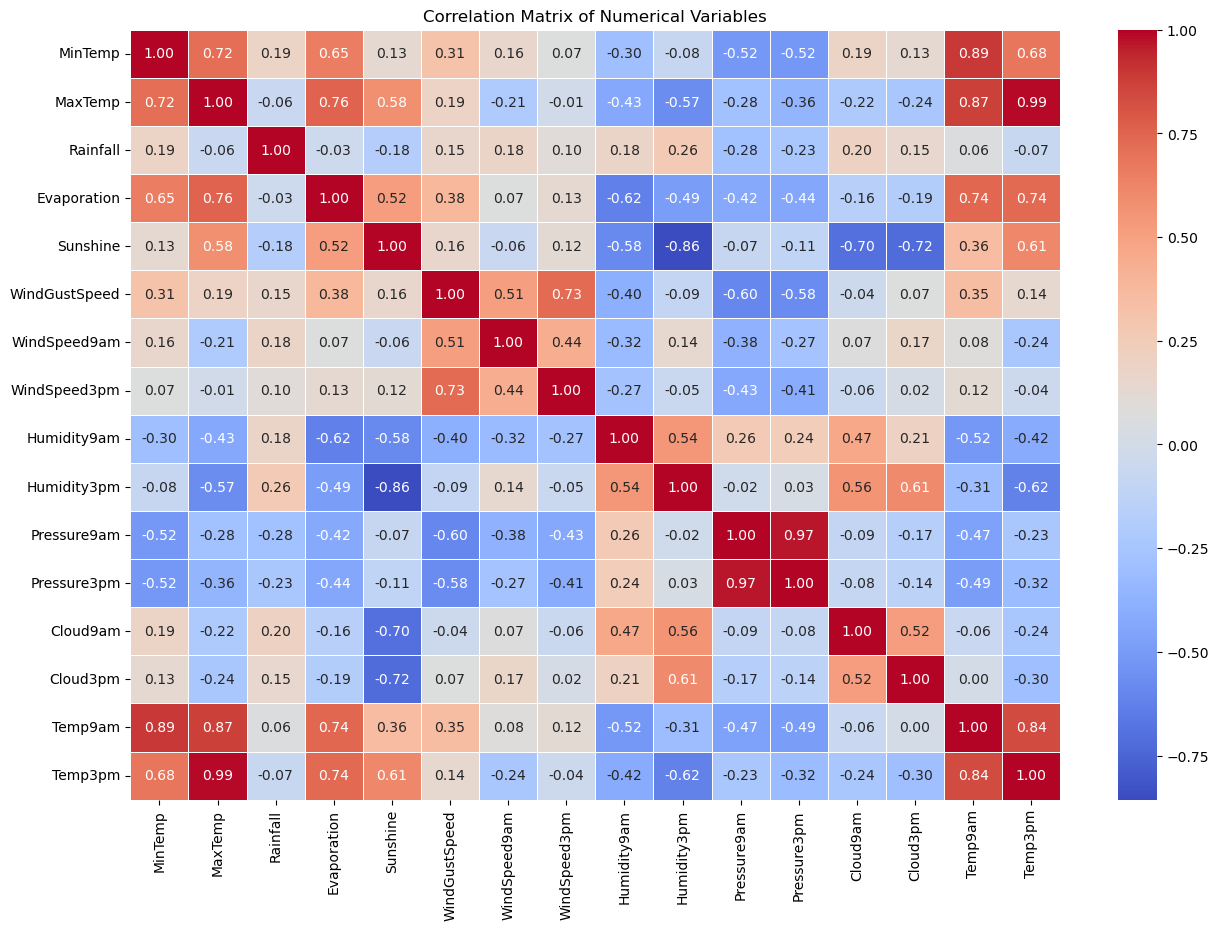

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = canberra_data[numerical_cols].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


In [164]:
canberra_data.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
45587  2007-11-01  Canberra      8.0     24.3       0.0          3.4   
45588  2007-11-02  Canberra     14.0     26.9       3.6          4.4   
45589  2007-11-03  Canberra     13.7     23.4       3.6          5.8   
45590  2007-11-04  Canberra     13.3     15.5      39.8          7.2   
45591  2007-11-05  Canberra      7.6     16.1       2.8          5.6   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
45587       6.3          NW           30.0         SW  ...        68.0   
45588       9.7         ENE           39.0          E  ...        80.0   
45589       3.3          NW           85.0          N  ...        82.0   
45590       9.1          NW           54.0        WNW  ...        62.0   
45591      10.6         SSE           50.0        SSE  ...        68.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
45587         29.0       1019.7       1015.0       7.0       7.0     14.4   
45588         36.0       1012.4       1008.4       5.0       3.0     17.5   
45589         69.0       1009.5       1007.2       8.0       7.0     15.4   
45590         56.0       1005.5       1007.0       2.0       7.0     13.5   
45591         49.0       1018.3       1018.5       7.0       7.0     11.1   

       Temp3pm  RainToday  RainTomorrow  
45587     23.6         No           Yes  
45588     25.7        Yes           Yes  
45589     20.2        Yes           Yes  
45590     14.1        Yes           Yes  
45591     15.4        Yes            No  

[5 rows x 23 columns]

C:\Users\ayodh\AppData\Local\Temp\ipykernel_22508\4155661165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canberra_data['Date'] = pd.to_datetime(canberra_data['Date'])


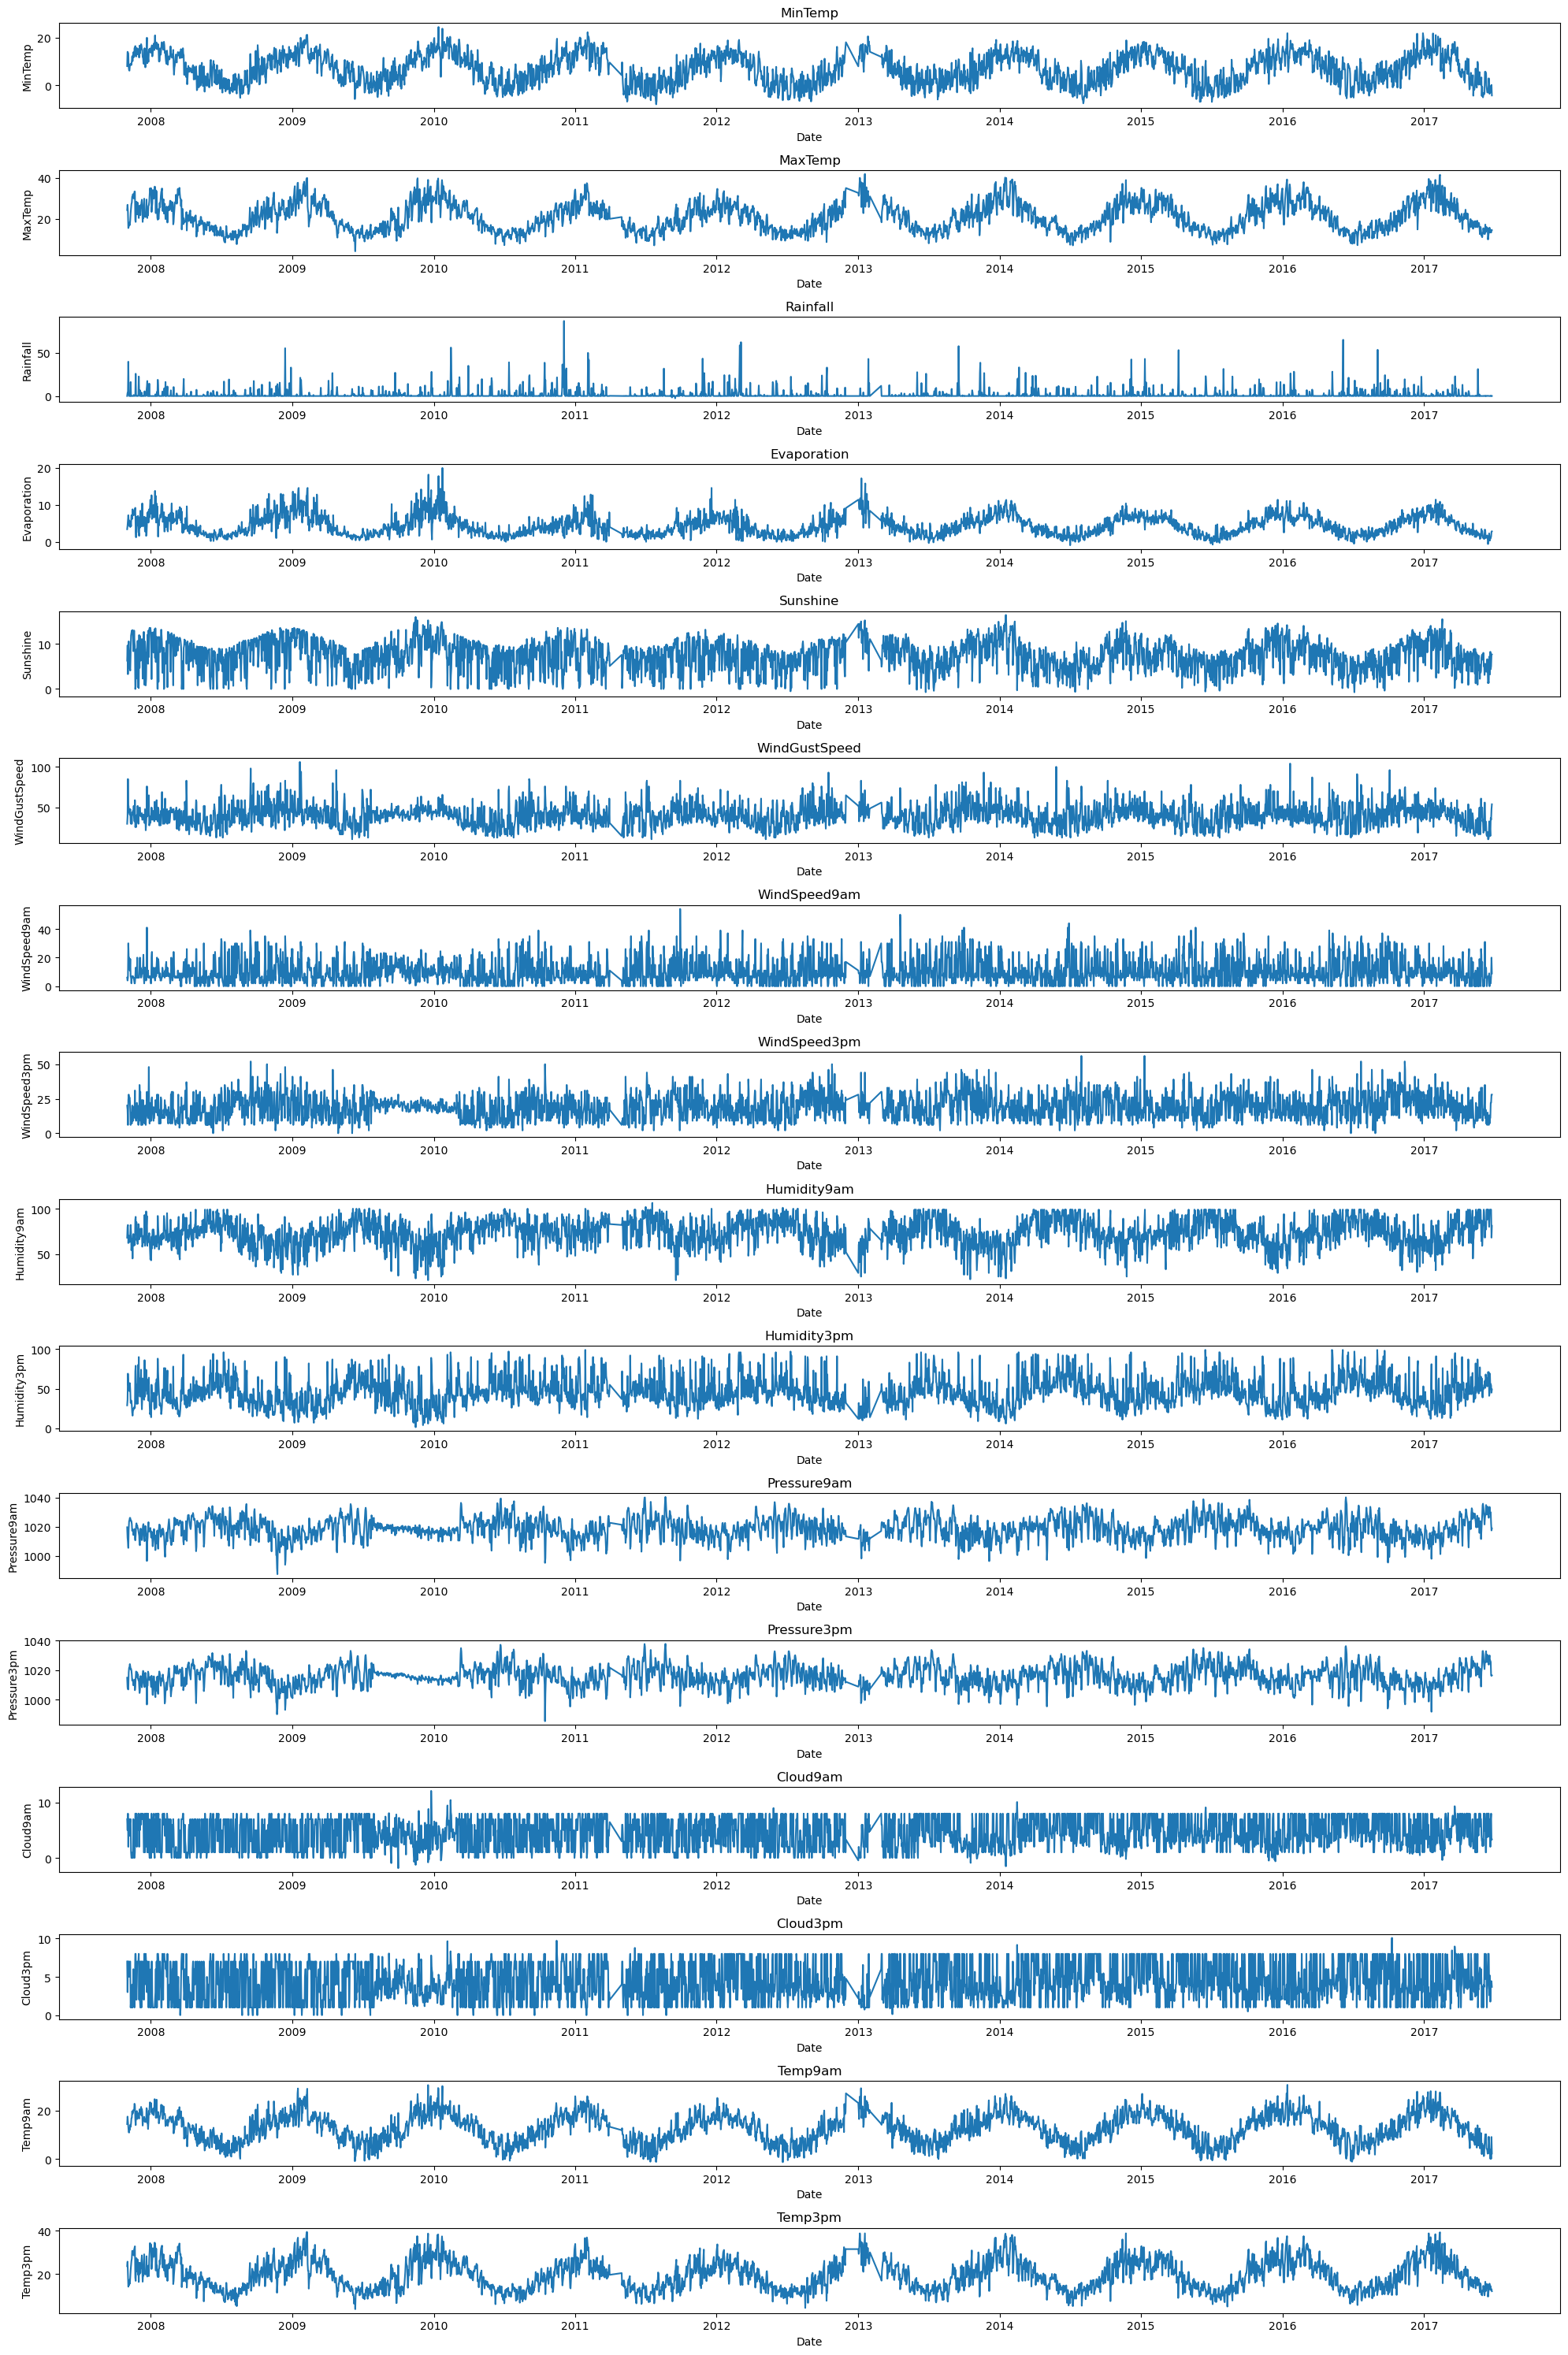

In [165]:
# Convert 'Date' column to datetime format
canberra_data['Date'] = pd.to_datetime(canberra_data['Date'])

# Plotting the numerical variables against the 'Date' column
plt.figure(figsize=(20, 30))

for index, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, index)
    plt.plot(canberra_data['Date'], canberra_data[col])
    plt.title(col)
    plt.ylabel(col)
    plt.xlabel('Date')

plt.tight_layout()
plt.show()


In [166]:
# Filter the dataset for entries after April 2013
subset_after_2013 = canberra_data[canberra_data['Date'] > '2013-04-30']

# Check for missing values in the subset
missing_values_after_2013 = subset_after_2013.isnull().sum()

missing_values_after_2013


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [167]:
# Create a complete date range from the minimum to the maximum date in the subset
complete_date_range = pd.date_range(start=subset_after_2013['Date'].min(), end=subset_after_2013['Date'].max())

# Find dates that are missing in the subset
missing_dates = complete_date_range.difference(subset_after_2013['Date'])

missing_dates


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [169]:
subset_after_2013.head(5)

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
47506 2013-05-01  Canberra      5.3     21.2       0.0          2.0   
47507 2013-05-02  Canberra      0.4     17.0       0.0          3.8   
47508 2013-05-03  Canberra     -0.9     20.2       0.0          3.2   
47509 2013-05-04  Canberra      6.9     23.8       0.0          3.8   
47510 2013-05-05  Canberra     -1.2     16.0       0.0          5.0   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
47506   6.092287         WNW      48.000000          W  ...   92.000000   
47507  10.915243          NW      36.947751          S  ...   50.000000   
47508  10.673899          NW      41.934742        NNE  ...   80.000000   
47509  12.239583         WNW      48.000000        NNW  ...   60.297905   
47510  10.545751         ESE      28.000000        SSE  ...   52.000000   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am  \
47506         34.0  1020.500000       1017.2  5.000000  8.000000  11.600000   
47507         23.0  1027.100000       1025.7  1.000000  2.375125  10.400000   
47508         24.0  1027.300000       1020.8  2.000000  1.457263   6.900000   
47509         11.0  1020.081274       1017.9  1.609229  1.948236  13.656393   
47510         27.0  1026.500000       1022.4  0.000000  2.305342   8.400000   

       Temp3pm  RainToday  RainTomorrow  
47506     18.6         No            No  
47507     16.7         No            No  
47508     19.2         No            No  
47509     22.2         No            No  
47510     15.1         No            No  

[5 rows x 23 columns]

In [171]:
subset_after_2013.to_csv('cleaned_aus.csv')

In [125]:
# # Calculate the percentage of missing data for each column grouped by location
# missing_data_by_location = df.groupby('Location').apply(lambda x: (x.isnull().sum() / len(x)) * 100)

# missing_data_by_location

In [126]:
# # Calculate the total missing data percentage for each location
# total_missing_data_by_location = missing_data_by_location.mean(axis=1)

# # Identify the location with the minimum missing data percentage
# min_missing_data_location = total_missing_data_by_location.idxmin()
# min_missing_percentage = total_missing_data_by_location.min()

# min_missing_data_location, min_missing_percentage

In [127]:
# Find the location with the minimum missing dates
min_missing_dates_location = missing_dates_by_location_df.loc[missing_dates_by_location_df['Missing Dates Count'].idxmin()]

# Find the location with the minimum missing rainfall data
min_missing_rainfall_location = missing_rainfall_counts_by_location_df.loc[missing_rainfall_counts_by_location_df['Missing Rainfall Count'].idxmin()]

min_missing_dates_location, min_missing_rainfall_location


(Location               Canberra
 Missing Dates Count          89
 Name: 15, dtype: object,
 Location                  Mildura
 Missing Rainfall Count          2
 Name: 18, dtype: object)

In [128]:
# Filter the dataset for "Canberra" location
canberra_data = df[df["Location"] == "Canberra"]

# Count the number of missing rainfall entries for "Canberra"
missing_rainfall_canberra = canberra_data["Rainfall"].isnull().sum()

missing_rainfall_canberra


18

In [129]:
# Calculate the percentage of missing values for each column in Canberra data
missing_percentages_canberra = (canberra_data.isnull().sum() / len(canberra_data)) * 100

missing_percentages_canberra


Date              0.000000
Location          0.000000
MinTemp           0.174622
MaxTemp           0.087311
Rainfall          0.523865
Evaporation      46.682189
Sunshine         55.733411
WindGustDir       9.866123
WindGustSpeed     9.807916
WindDir9am       15.745052
WindDir3pm        6.635623
WindSpeed9am      6.664726
WindSpeed3pm      6.490105
Humidity9am       1.833527
Humidity3pm       0.349243
Pressure9am       6.577416
Pressure3pm       6.431898
Cloud9am         31.199069
Cloud3pm         36.757858
Temp9am           0.523865
Temp3pm           0.203725
RainToday         0.523865
RainTomorrow      0.523865
dtype: float64

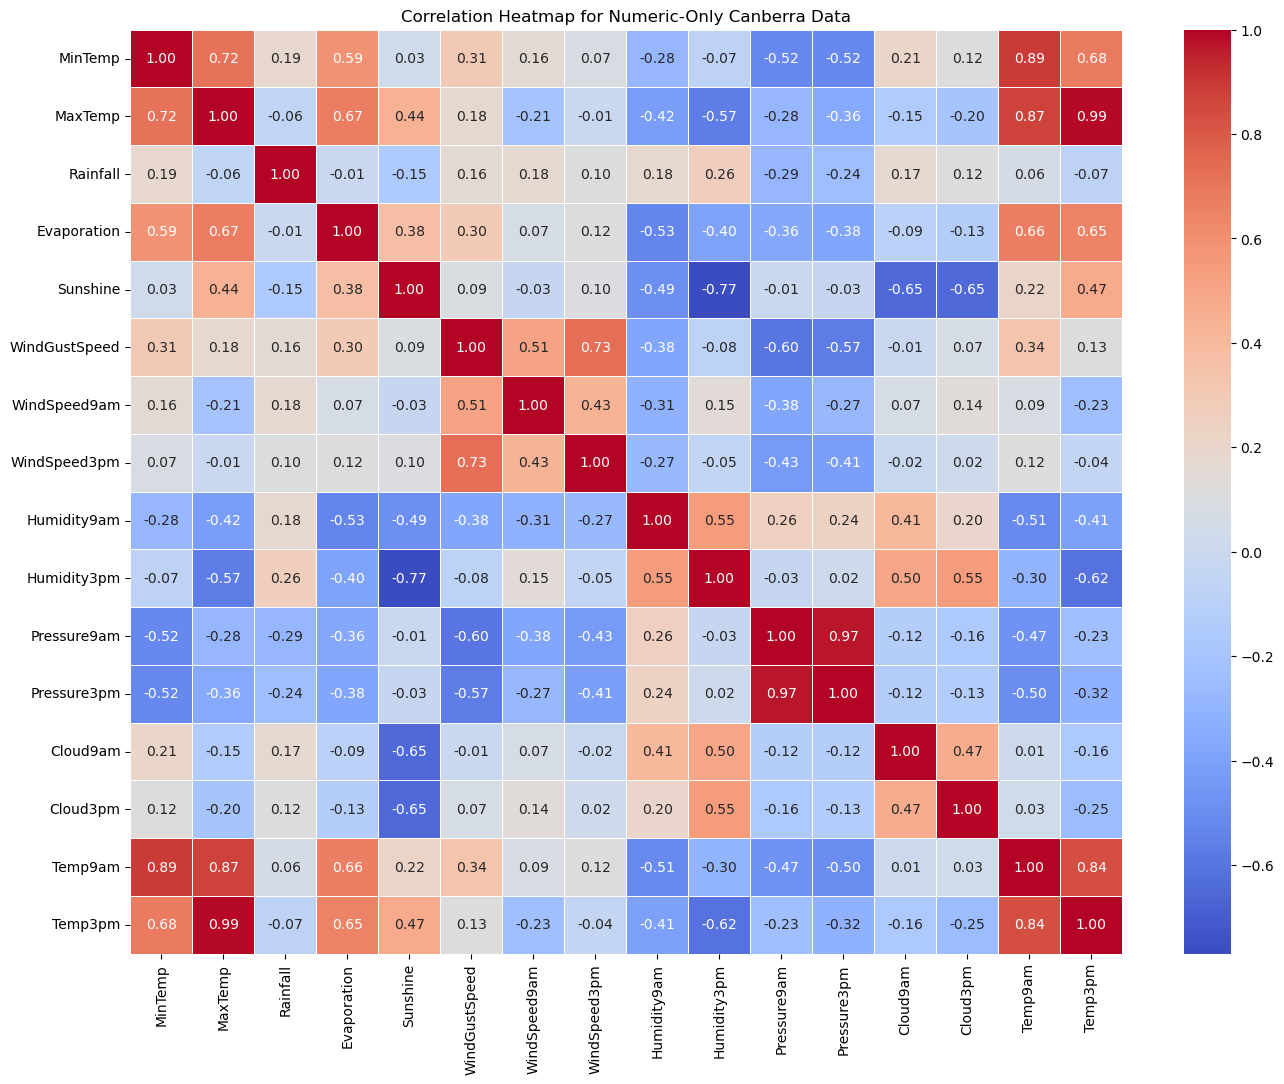

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop columns with string values to compute the correlation matrix
numeric_columns_only = canberra_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numeric-only Canberra data
correlation_matrix_numeric_only = numeric_columns_only.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_numeric_only, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric-Only Canberra Data')
plt.show()


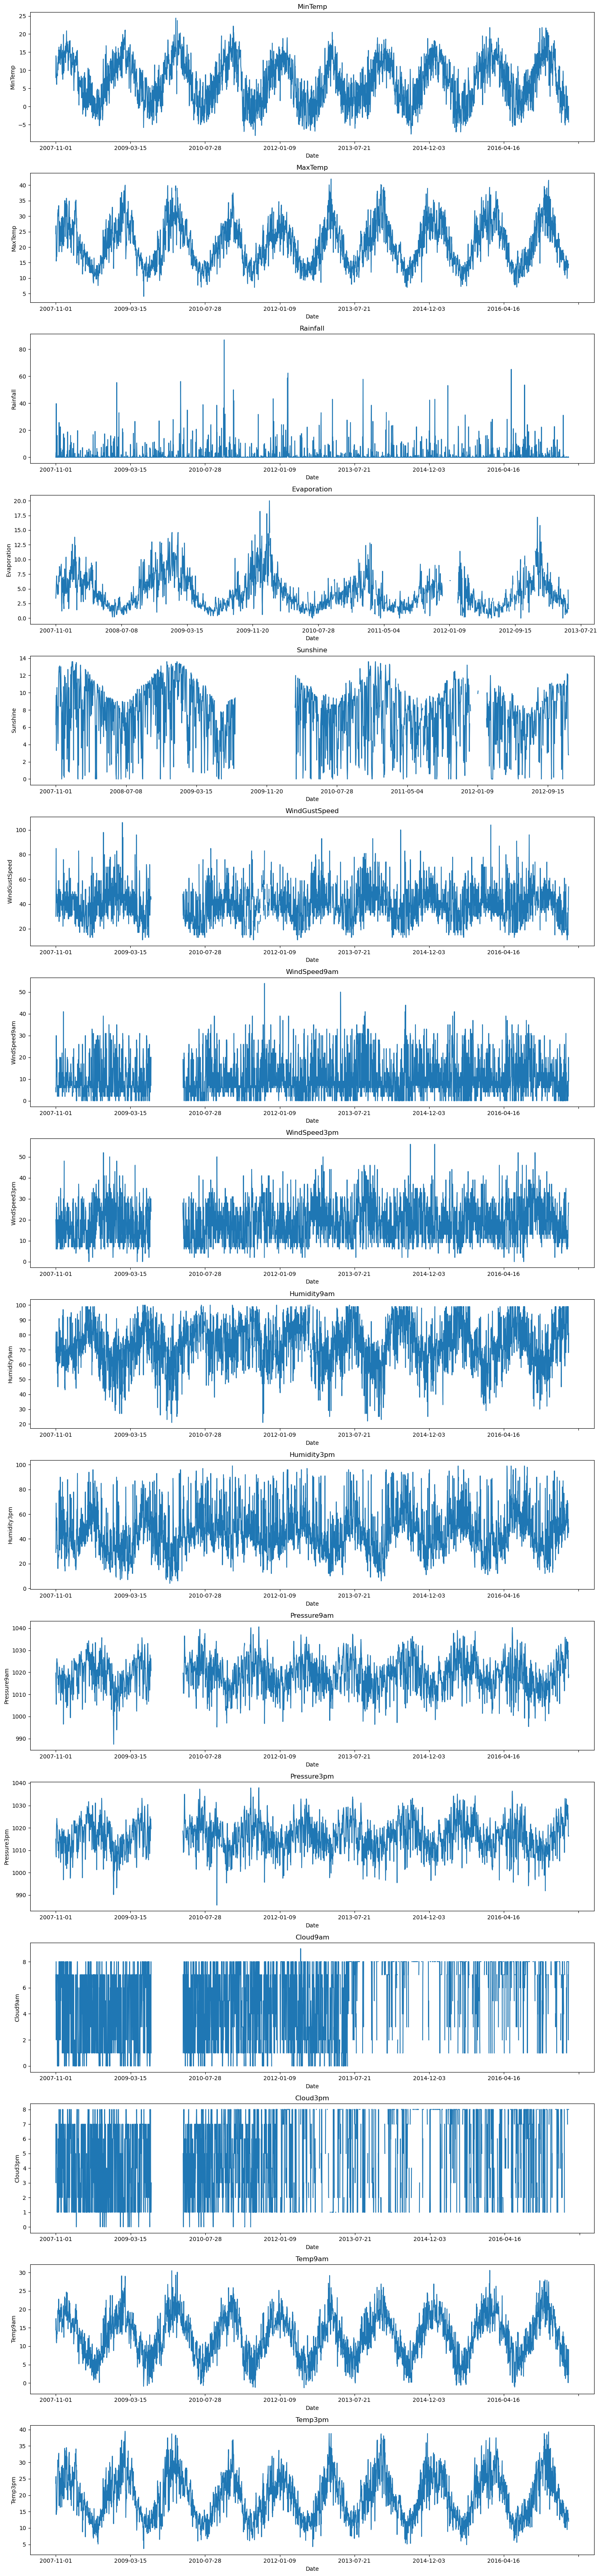

In [131]:
# Set 'Date' as the index for Canberra data
canberra_data_time_series = canberra_data.set_index('Date')

# Plot time series for each numeric column
plt.figure(figsize=(15, 4 * len(numeric_columns_only.columns)))

for idx, column in enumerate(numeric_columns_only.columns, 1):
    plt.subplot(len(numeric_columns_only.columns), 1, idx)
    canberra_data_time_series[column].plot(title=column)
    plt.ylabel(column)
    plt.tight_layout()

plt.show()


In [132]:
# # Fill numerical columns using interpolation
# numeric_cols_canberra = canberra_data_time_series.select_dtypes(include=['float64', 'int64']).columns
# canberra_data_time_series[numeric_cols_canberra] = canberra_data_time_series[numeric_cols_canberra].interpolate(method='linear', limit_direction='both')

# # Fill categorical columns using forward fill and then backward fill
# categorical_cols_canberra = canberra_data_time_series.select_dtypes(exclude=['float64', 'int64']).columns
# canberra_data_time_series[categorical_cols_canberra] = canberra_data_time_series[categorical_cols_canberra].fillna(method='ffill').fillna(method='bfill')

# # Re-plot time series for each numeric column after filling missing values
# plt.figure(figsize=(15, 4 * len(numeric_cols_canberra)))

# for idx, column in enumerate(numeric_cols_canberra, 1):
#     plt.subplot(len(numeric_cols_canberra), 1, idx)
#     canberra_data_time_series[column].plot(title=column)
#     plt.ylabel(column)
#     plt.tight_layout()

# plt.show()


C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


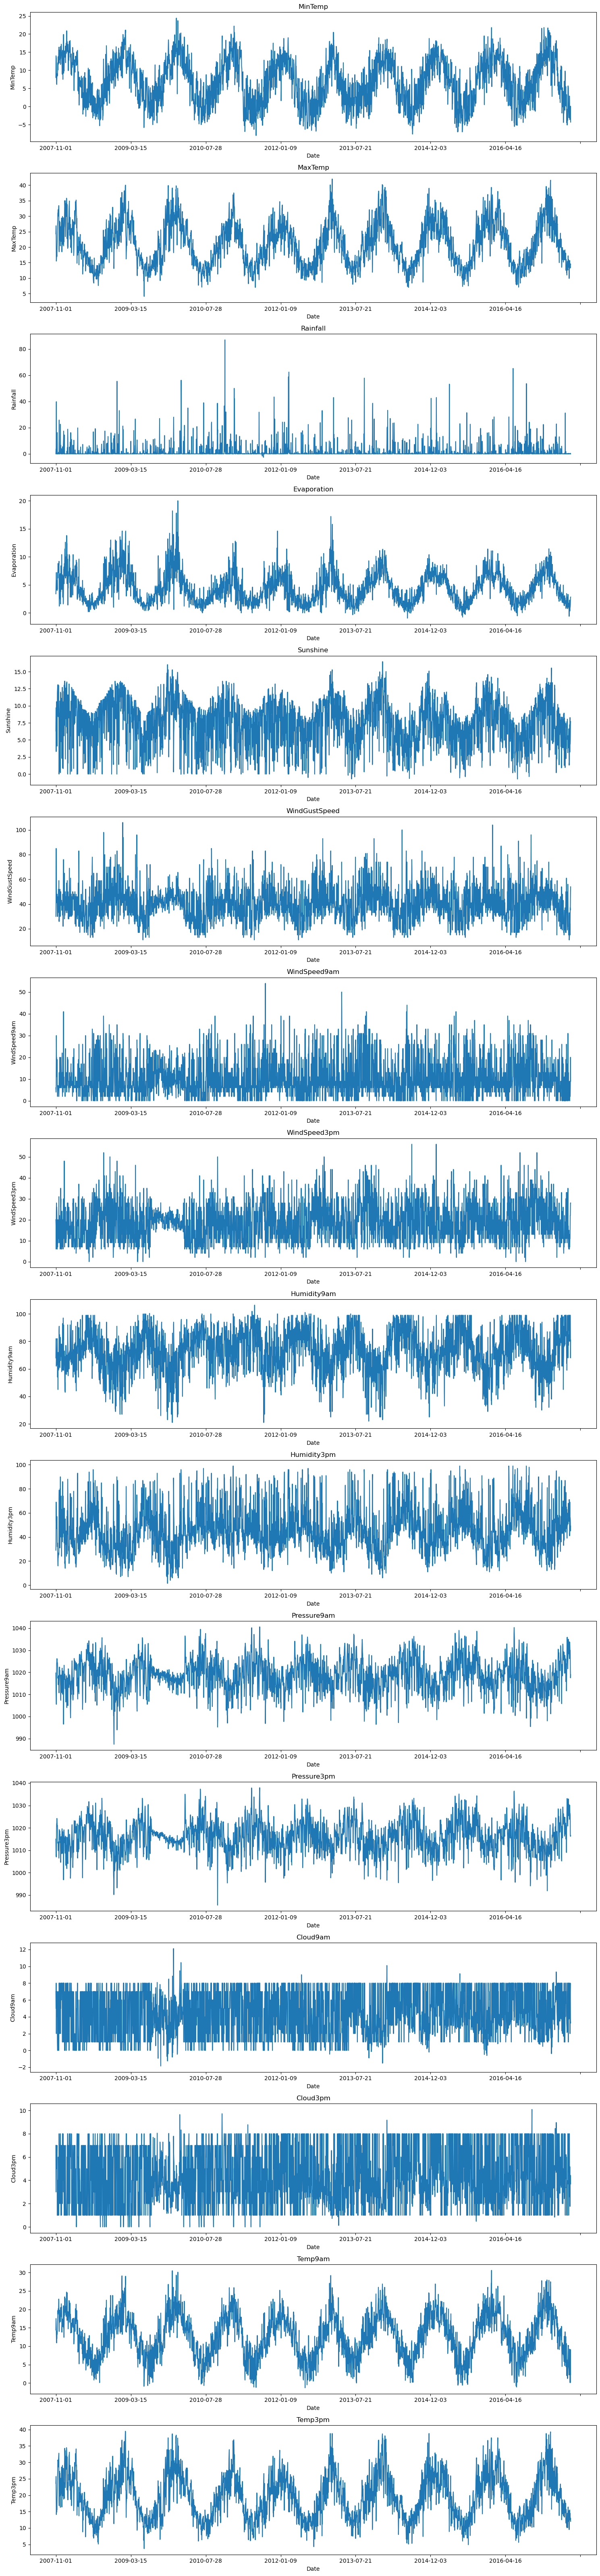

In [133]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize IterativeImputer
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# Apply Multiple Imputation using MICE on numeric columns
canberra_numeric_data = canberra_data_time_series[numeric_cols_canberra]
canberra_data_imputed = mice_imputer.fit_transform(canberra_numeric_data)

# Convert the result back to a DataFrame and set the Date index
canberra_data_imputed_df = pd.DataFrame(canberra_data_imputed, columns=numeric_cols_canberra)
canberra_data_imputed_df.index = canberra_data_time_series.index

# Re-plot time series for each numeric column after Multiple Imputation
plt.figure(figsize=(15, 4 * len(numeric_cols_canberra)))

for idx, column in enumerate(numeric_cols_canberra, 1):
    plt.subplot(len(numeric_cols_canberra), 1, idx)
    canberra_data_imputed_df[column].plot(title=column)
    plt.ylabel(column)
    plt.tight_layout()

plt.show()


In [134]:
# Filter the dataset to include only data from July 2010 onwards
df = canberra_data_imputed_df[canberra_data_imputed_df.index >= "2010-07"]

# Display the first few rows of the filtered data
df.head()


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
Date                                                                           
2010-07-01     -1.4     11.4       0.0          1.2       5.8           31.0   
2010-07-02     -3.5      7.1       0.0          1.6       1.1           20.0   
2010-07-03      0.0     11.5       6.2          0.2       7.1           17.0   
2010-07-04     -4.3     12.3       0.0          2.4       8.1           17.0   
2010-07-05     -3.7     12.8       0.0          1.0       4.2           17.0   

            WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Date                                                                            
2010-07-01           6.0          20.0         99.0         42.0       1025.5   
2010-07-02           2.0           9.0         97.0         85.0       1028.0   
2010-07-03           4.0           6.0        100.0         47.0       1028.6   
2010-07-04           0.0           9.0         98.0         48.0       1032.9   
2010-07-05           0.0           4.0         94.0         58.0       1028.8   

            Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
Date                                                           
2010-07-01       1023.8       7.0       3.0      3.1     10.6  
2010-07-02       1024.7       7.0       8.0      0.0      6.4  
2010-07-03       1028.1       8.0       5.0      1.0     11.0  
2010-07-04       1028.7       1.0       4.0      0.0     11.8  
2010-07-05       1024.3       8.0       7.0      2.5     12.6

In [135]:
# Retrieve the categorical columns from the original Canberra dataset for dates post July 2010
canberra_categorical_data_post_2010_07 = canberra_data_time_series.loc[canberra_data_post_2010_07.index, categorical_cols_canberra]

# Combine the numeric and categorical datasets
combined_canberra_data_post_2010_07 = pd.concat([canberra_data_post_2010_07, canberra_categorical_data_post_2010_07], axis=1)

# Display the head of the combined dataset
combined_canberra_data_post_2010_07.head()


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
Date                                                                           
2010-07-01     -1.4     11.4       0.0          1.2       5.8           31.0   
2010-07-02     -3.5      7.1       0.0          1.6       1.1           20.0   
2010-07-03      0.0     11.5       6.2          0.2       7.1           17.0   
2010-07-04     -4.3     12.3       0.0          2.4       8.1           17.0   
2010-07-05     -3.7     12.8       0.0          1.0       4.2           17.0   

            WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
Date                                                              ...   
2010-07-01           6.0          20.0         99.0         42.0  ...   
2010-07-02           2.0           9.0         97.0         85.0  ...   
2010-07-03           4.0           6.0        100.0         47.0  ...   
2010-07-04           0.0           9.0         98.0         48.0  ...   
2010-07-05           0.0           4.0         94.0         58.0  ...   

            Cloud9am  Cloud3pm  Temp9am  Temp3pm  Location  WindGustDir  \
Date                                                                      
2010-07-01       7.0       3.0      3.1     10.6  Canberra          WNW   
2010-07-02       7.0       8.0      0.0      6.4  Canberra           NW   
2010-07-03       8.0       5.0      1.0     11.0  Canberra           SE   
2010-07-04       1.0       4.0      0.0     11.8  Canberra            N   
2010-07-05       8.0       7.0      2.5     12.6  Canberra            E   

           WindDir9am WindDir3pm RainToday RainTomorrow  
Date                                                     
2010-07-01        SSE        WNW        No           No  
2010-07-02          N          N        No          Yes  
2010-07-03        NNE        SSW       Yes           No  
2010-07-04        NaN          N        No           No  
2010-07-05        NaN         SW        No          Yes  

[5 rows x 22 columns]

In [136]:
# Count missing values in the categorical columns of the post July 2010 Canberra dataset
missing_values_categorical = combined_canberra_data_post_2010_07[categorical_cols_canberra].isnull().sum()

missing_values_categorical


Location          0
WindGustDir     122
WindDir9am      255
WindDir3pm       13
RainToday        18
RainTomorrow     18
dtype: int64

In [137]:
# Extracting rows corresponding to Canberra
canberra_data = combined_canberra_data_post_2010_07[combined_canberra_data_post_2010_07['Location'] == 'Canberra']

# Fill 'RainToday' and 'RainTomorrow' columns based on 'Rainfall' logic
canberra_data['RainToday'] = canberra_data['RainToday'].where(canberra_data['Rainfall'] <= 1, 'Yes')
canberra_data['RainToday'] = canberra_data['RainToday'].where(canberra_data['Rainfall'] > 1, 'No')
canberra_data['RainTomorrow'] = canberra_data['RainTomorrow'].shift(-1) # Shift to get the next day's rainfall
canberra_data['RainTomorrow'] = canberra_data['RainTomorrow'].where(canberra_data['Rainfall'] <= 1, 'Yes')
canberra_data['RainTomorrow'] = canberra_data['RainTomorrow'].where(canberra_data['Rainfall'] > 1, 'No')

# Display the first few rows of the modified Canberra dataset
canberra_data.head()


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
Date                                                                           
2010-07-01     -1.4     11.4       0.0          1.2       5.8           31.0   
2010-07-02     -3.5      7.1       0.0          1.6       1.1           20.0   
2010-07-03      0.0     11.5       6.2          0.2       7.1           17.0   
2010-07-04     -4.3     12.3       0.0          2.4       8.1           17.0   
2010-07-05     -3.7     12.8       0.0          1.0       4.2           17.0   

            WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
Date                                                              ...   
2010-07-01           6.0          20.0         99.0         42.0  ...   
2010-07-02           2.0           9.0         97.0         85.0  ...   
2010-07-03           4.0           6.0        100.0         47.0  ...   
2010-07-04           0.0           9.0         98.0         48.0  ...   
2010-07-05           0.0           4.0         94.0         58.0  ...   

            Cloud9am  Cloud3pm  Temp9am  Temp3pm  Location  WindGustDir  \
Date                                                                      
2010-07-01       7.0       3.0      3.1     10.6  Canberra          WNW   
2010-07-02       7.0       8.0      0.0      6.4  Canberra           NW   
2010-07-03       8.0       5.0      1.0     11.0  Canberra           SE   
2010-07-04       1.0       4.0      0.0     11.8  Canberra            N   
2010-07-05       8.0       7.0      2.5     12.6  Canberra            E   

           WindDir9am WindDir3pm RainToday RainTomorrow  
Date                                                     
2010-07-01        SSE        WNW        No           No  
2010-07-02          N          N        No           No  
2010-07-03        NNE        SSW       Yes          Yes  
2010-07-04        NaN          N        No           No  
2010-07-05        NaN         SW        No           No  

[5 rows x 22 columns]

In [138]:
# Count missing values in the categorical columns of the post July 2010 Canberra dataset
missing_values_categorical = canberra_data[categorical_cols_canberra].isnull().sum()

missing_values_categorical

Location          0
WindGustDir     122
WindDir9am      255
WindDir3pm       13
RainToday         0
RainTomorrow      0
dtype: int64

In [139]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Identify categorical columns
# categorical_cols = canberra_data.select_dtypes(include=['object']).columns.tolist()
# if 'Date' in categorical_cols:
#     categorical_cols.remove('Date')

# categorical_cols.remove('Location')  # Already filtered to Canberra, no need for imputation

# # Convert categorical columns to category type and assign codes
# category_mappings = {}
# for col in categorical_cols:
#     canberra_data[col] = canberra_data[col].astype('category')
#     category_mappings[col] = {index: category for index, category in enumerate(canberra_data[col].cat.categories)}
#     canberra_data[col] = canberra_data[col].cat.codes

# # Use MICE to impute missing values
# imputer = IterativeImputer(max_iter=10, random_state=0)
# canberra_data_imputed = imputer.fit_transform(canberra_data.select_dtypes(exclude=['object']))

# # Convert the imputed data back to a DataFrame
# canberra_data_imputed_df = pd.DataFrame(canberra_data_imputed, columns=canberra_data.select_dtypes(exclude=['object']).columns)

# # Convert the imputed codes back to original categories
# for col, mapping in category_mappings.items():
#     canberra_data_imputed_df[col] = canberra_data_imputed_df[col].round().astype(int)
#     canberra_data_imputed_df[col] = canberra_data_imputed_df[col].map(mapping)

# # Replace the original columns with imputed columns
# canberra_data[categorical_cols] = canberra_data_imputed_df[categorical_cols]

# # Display the first few rows of the imputed dataset
# canberra_data.head()


In [140]:
# # Count missing values in the categorical columns of the post July 2010 Canberra dataset
# missing_values_categorical = canberra_data[categorical_cols_canberra].isnull().sum()

# missing_values_categorical

In [141]:
# import matplotlib.pyplot as plt

# # Extract relevant columns
# df_rainfall = df[["Date", "Location", "Rainfall"]]

# # List of unique locations
# locations = df_rainfall["Location"].unique()

# # Plotting time series rainfall data for each location
# plt.figure(figsize=(15, 5 * len(locations)))

# for index, location in enumerate(locations, 1):
#     plt.subplot(len(locations), 1, index)
#     location_data = df_rainfall[df_rainfall["Location"] == location]
#     plt.plot(pd.to_datetime(location_data["Date"]), location_data["Rainfall"], label=location)
#     plt.title(location)
#     plt.xlabel('Date')
#     plt.ylabel('Rainfall (mm)')
#     plt.tight_layout()

# plt.show()


In [142]:
# df = df[df['Location'] == 'Canberra']

In [143]:
# df.head()

In [144]:
# 

# # Extracting only numerical columns
# numerical_columns = df.select_dtypes(include=['float64']).columns

# # Creating time series plots for each numerical column
# for column in numerical_columns:
#     plt.figure(figsize=(15, 6))
#     plt.plot(df['Date'], df[column])
#     plt.title(column)
#     plt.xlabel('Date')
#     plt.ylabel(column)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [145]:
# location_data = df[df['Location'] == 'Canberra']

# columns_to_compare = ['MaxTemp', 'Humidity9am', 'Evaporation', 'WindGustSpeed', 'Sunshine', 'Cloud9am', 'Pressure9am']
# # Plotting time series relationships for each column
# for column in columns_to_compare:
#     fig, ax1 = plt.subplots(figsize=(15, 5))
    
#     # Plotting Rainfall data
#     ax1.set_xlabel('Date')
#     ax1.set_ylabel('Rainfall (mm)', color='blue')
#     ax1.plot(location_data['Date'], location_data['Rainfall'], color='blue', alpha=0.6, label='Rainfall')
#     ax1.tick_params(axis='y', labelcolor='blue')
    
#     # Creating a second y-axis to plot the other column
#     ax2 = ax1.twinx()
#     ax2.set_ylabel(column, color='green')
#     ax2.plot(location_data['Date'], location_data[column], color='green', alpha=0.6, label=column)
#     ax2.tick_params(axis='y', labelcolor='green')
    
#     # Title and show plot
#     plt.title(f"Time Series of Rainfall and {column} in MelbourneAirport")
#     plt.tight_layout()
#     plt.show()

In [146]:
# # Identify columns with missing values and their counts
# missing_values = df.isnull().sum()
# missing_values = missing_values[missing_values > 0]

# missing_values


In [147]:
# df.head(10)

In [148]:
# # Fill numerical columns using interpolation
# numerical_cols = ["Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "Humidity9am", "Humidity3pm", "Cloud3pm"]
# df[numerical_cols] = df[numerical_cols].interpolate(method='linear', limit_direction='both')

# # Fill categorical columns using forward fill and then backward fill
# categorical_cols = ["WindGustDir", "WindDir9am", "WindDir3pm"]
# df[categorical_cols] = df[categorical_cols].fillna(method='ffill').fillna(method='bfill')

# # Check if any missing values remain
# remaining_missing_values = df.isnull().sum()
# remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]

# remaining_missing_values


In [149]:
# df.isnull().sum()

In [150]:
# # Convert categorical columns to uppdercase and trim white spaces
# for col in categorical_cols:
#     df[col] = df[col].str.upper().str.strip()

# # Display the unique values and their counts for each categorical column after cleanup
# cleaned_categorical_values = {}

# for col in categorical_cols:
#     cleaned_categorical_values[col] = df[col].value_counts()

# cleaned_categorical_values

In [151]:
# # Cross-field validations

# # 1. Temperature Consistency
# temp_inconsistencies = df[df['MinTemp'] > df['MaxTemp']]

# # 2. Pressure Consistency
# pressure_inconsistencies_9am = df[(df['Pressure9am'] < 800) | (df['Pressure9am'] > 1100)]
# pressure_inconsistencies_3pm = df[(df['Pressure3pm'] < 800) | (df['Pressure3pm'] > 1100)]

# # 3. Rainfall and RainToday Consistency
# rainfall_inconsistencies = df[((df['Rainfall'] > 1) & (df['RainToday'] != 'Yes')) | 
#                                 ((df['Rainfall'] <= 1) & (df['RainToday'] != 'No'))]

# cross_field_results = {
#     "Temperature Inconsistencies": len(temp_inconsistencies),
#     "Pressure Inconsistencies (9am)": len(pressure_inconsistencies_9am),
#     "Pressure Inconsistencies (3pm)": len(pressure_inconsistencies_3pm),
#     "Rainfall and RainToday Inconsistencies": len(rainfall_inconsistencies)
# }

# cross_field_results

In [152]:
# df.to_csv('cleaned_aus.csv')

In [153]:
# # Sort the MelbourneAirport data by 'Date'
# melbourne_airport_data_sorted = df.sort_values(by='Date')

# # Display the first few rows of the sorted data
# df.head()


In [154]:
# df.head(5)